# Problem set 3. Why is the 20th-century world so unequal?

## Does governance play an important role in prosperity

These problem set assignments are a required part of the course.

Collaborating on the problem sets is more than okay—it is encouraged! Seek help from a classmate or an instructor or a roommate or a passerby when you get stuck! (Explaining things is beneficial, too—the best way to solidify your knowledge of a subject is to explain it.) 

But the work should be your own.

No cutting-&-pasting from others' problem sets, please! We want you to learn this stuff, and your fingers typing every keystroke is an important way of building muscle memory here.

In this problem set, you will...

Let us get started!

&nbsp;

# 1. Preliminaries

### A. Computing environment

First, we set up the computing environment with the libraries we need: 

In [1]:
# set up the computing environment: ensure that graphs
# appear inline in the notebook & not in extra windows:

%matplotlib inline

In [2]:
# set up the computing environment: get the ok system library...

from client.api.notebook import Notebook
# ok = Notebook('ps02.ok')

In [3]:
# set up the computing environment: import other libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
#libraries:

!pip install linearmodels
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

&nbsp;

### B. Reproduce the results of problem set 1

Recall our estimates of humanity's economy in the very long run from the last problem set. Let's repeat their construction:


In [5]:
# repeating the work of problem set 1:

long_run_growth_list = [
    [-68000, 0.1, 1200, 379.47],
    [-8000, 2.5, 1200, 1897.37],
    [-6000, 7, 900, 2381.18],
    [-3000, 15, 900, 3485.68],
    [-1000, 50, 900, 6363.96],
    [1, 170, 900, 11734.56],
    [1500, 500, 900, 20124.61],
    [1770, 750, 1100, 30124.74],
    [1870, 1300, 1300, 46872.1],
    [2020, 7600, 11842, 1032370.8]
    ]

long_run_growth_df = pd.DataFrame(
  data=np.array(long_run_growth_list), columns = ['year', 'population', 
  'income_level', 'human_ideas']
  )

long_run_growth_df['year'] = long_run_growth_df['year'].apply(np.int64)

initial_year = long_run_growth_df['year'][0:10]

span = []
g = []
h = []
n = []

for t in range(9):
    span = span + [long_run_growth_df['year'][t+1]-long_run_growth_df['year'][t]]
    h = h + [np.log(long_run_growth_df['human_ideas'][t+1]/long_run_growth_df['human_ideas'][t])/span[t]]
    g = g + [np.log(long_run_growth_df['income_level'][t+1]/long_run_growth_df['income_level'][t])/span[t]]
    n = n + [np.log(long_run_growth_df['population'][t+1]/long_run_growth_df['population'][t])/span[t]]
    
long_run_growth_df.set_index('year', inplace=True)

# finally, add a note to the end of each observation, reminding
# us of what was going on in human history back in each of the
# eras into which we have divided it

eras = ['at the dawn', 'agriculture & herding', 'proto-agrarian age',
        'writing', 'axial age', 'dark & middle age slowdown', 'commercial revolution',
        'industrial revolution', 'modern economic growth', 'whatever the 21st century brings']

long_run_growth_df['eras'] = eras

format_dict = {'year': '{d}', 'human_ideas': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}'}

print('WORLD LEVELS')
long_run_growth_df.style.format(format_dict)

WORLD LEVELS


,population,income_level,human_ideas,eras
year,,,,
-68000,0.1,"$1,200",379,at the dawn
-8000,2.5,"$1,200","1,897",agriculture & herding
-6000,7.0,$900,"2,381",proto-agrarian age
-3000,15.0,$900,"3,486",writing
-1000,50.0,$900,"6,364",axial age
1,170.0,$900,"11,735",dark & middle age slowdown
1500,500.0,$900,"20,125",commercial revolution
1770,750.0,"$1,100","30,125",industrial revolution
1870,"1,300.0","$1,300","46,872",modern economic growth


In [6]:
data_list = np.array([span, h, g, n]).transpose()

long_run_growth_rates_df = pd.DataFrame(
    data=data_list, columns = ['span', 'n', 'g', 'h'])

long_run_growth_rates_df['initial_year'] = initial_year

eras2 = eras[0:9]

long_run_growth_rates_df['era'] = eras2

format_dict = {'initial_year':'{0:.0f}',  'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}'}

print('WORLD GROWTH RATES')
long_run_growth_rates_df.style.format(format_dict)

WORLD GROWTH RATES


,span,n,g,h,initial_year,era
0,60000,0.00%,0.00%,0.005%,-68000,at the dawn
1,2000,0.01%,-0.01%,0.051%,-8000,agriculture & herding
2,3000,0.01%,0.00%,0.025%,-6000,proto-agrarian age
3,2000,0.03%,0.00%,0.060%,-3000,writing
4,1001,0.06%,0.00%,0.122%,-1000,axial age
5,1499,0.04%,0.00%,0.072%,1,dark & middle age slowdown
6,270,0.15%,0.07%,0.150%,1500,commercial revolution
7,100,0.44%,0.17%,0.550%,1770,industrial revolution
8,150,2.06%,1.47%,1.177%,1870,modern economic growth


Now let me provide you with another set of data analogous to those for the world as a whole that I had you examine in problem set 1. This set will be for the "global north" or "west"—that part of the world that dominated the Americas starting in the 1500s and then became much richer and more powerful than the rest since the start of the 1700s—consisting of northwest Europe, and then by 1770 of that plus he Atlantic seaboard of the Americas, adding on Australia and New Zealand by 1870, and now including those areas plus southwest and some of central Europe, plus Japan, South Korea, and Taiwan.

In [7]:
# for the "global north" or "west":

long_run_growth_list_global_north = [
    [-68000, 0.00001, 1200, 379.47, 0.0001],
    [-8000, 0.1, 1200, 1897.37, 0.0294],
    [-6000, 0.2, 900, 2012.5, 0.0294],
    [-3000, 0.5, 900, 3182, 0.0294],
    [-1000, 2, 900, 6364.1, 0.0294],
    [1, 5, 900, 10062.5, 0.0294],
    [1500, 25, 1000, 25000.4, 0.0294],
    [1770, 75, 1400, 42866.8, 0.0588],
    [1870, 175, 2800, 106928.6, 0.0882],
    [2020, 800, 50000, 3580637.4, 0.1147]
    ]

In [8]:
long_run_growth_global_north_df = pd.DataFrame(
  data=np.array(long_run_growth_list_global_north), columns = ['year', 'population', 
  'income_level', 'human_ideas', 'resources']
  )
long_run_growth_global_north_df['year'] = long_run_growth_global_north_df['year'].apply(np.int64)



In [9]:
initial_year = long_run_growth_global_north_df['year'][0:10]

span = []
g = []
h = []
n = []
rho = []

for t in range(9):
    span = span + [long_run_growth_global_north_df['year'][t+1]-long_run_growth_global_north_df['year'][t]]
    h = h + [np.log(long_run_growth_global_north_df['human_ideas'][t+1]/long_run_growth_global_north_df['human_ideas'][t])/span[t]]
    g = g + [np.log(long_run_growth_global_north_df['income_level'][t+1]/long_run_growth_global_north_df['income_level'][t])/span[t]]
    n = n + [np.log(long_run_growth_global_north_df['population'][t+1]/long_run_growth_global_north_df['population'][t])/span[t]]
    rho = rho + [np.log(long_run_growth_global_north_df['resources'][t+1]/long_run_growth_global_north_df['resources'][t])/span[t]]
    
n   

[0.00015350567286626972,
 0.00034657359027997266,
 0.0003054302439580517,
 0.0006931471805599453,
 0.0009153753565176374,
 0.001073674391216878,
 0.004068934402474481,
 0.008472978603872037,
 0.010132171691629421]

In [10]:
long_run_growth_global_north_df.set_index('year', inplace=True)

# finally, add a note to the end of each observation, reminding
# us of what was going on in human history back in each of the
# eras into which we have divided it

eras = ['at the dawn', 'agriculture & herding', 'proto-agrarian age',
        'writing', 'axial age', 'dark & middle age slowdown', 'commercial revolution',
        'industrial revolution', 'modern economic growth', 'whatever the 21st century brings']

long_run_growth_global_north_df['eras'] = eras

format_dict = {'year': '{d}', 'human_ideas': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}','resources': '{0:,.3f}'}

print('GLOBAL NORTH LEVELS')
long_run_growth_global_north_df.style.format(format_dict)

GLOBAL NORTH LEVELS


,population,income_level,human_ideas,resources,eras
year,,,,,
-68000,0.0,"$1,200",379,0.000,at the dawn
-8000,0.1,"$1,200","1,897",0.029,agriculture & herding
-6000,0.2,$900,"2,012",0.029,proto-agrarian age
-3000,0.5,$900,"3,182",0.029,writing
-1000,2.0,$900,"6,364",0.029,axial age
1,5.0,$900,"10,062",0.029,dark & middle age slowdown
1500,25.0,"$1,000","25,000",0.029,commercial revolution
1770,75.0,"$1,400","42,867",0.059,industrial revolution
1870,175.0,"$2,800","106,929",0.088,modern economic growth


In [11]:
data_list = np.array([span, h, g, n, rho]).transpose()

In [12]:
long_run_growth_rates_global_north_df = pd.DataFrame(
    data=data_list, columns = ['span', 'h', 'g', 'n', 'rho'])

long_run_growth_rates_global_north_df['initial_year'] = initial_year

eras2 = eras[0:9]

long_run_growth_rates_global_north_df['era'] = eras2

format_dict = {'initial_year':'{0:.0f}',  'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}', 'n': '{0:,.2%}' , 'rho': '{0:,.3%}'}

print('GLOBAL NORTH GROWTH RATES')
long_run_growth_rates_global_north_df.style.format(format_dict)

GLOBAL NORTH GROWTH RATES


,span,h,g,n,rho,initial_year,era
0,60000,0.003%,0.00%,0.02%,0.009%,-68000,at the dawn
1,2000,0.003%,-0.01%,0.03%,0.000%,-8000,agriculture & herding
2,3000,0.015%,0.00%,0.03%,0.000%,-6000,proto-agrarian age
3,2000,0.035%,0.00%,0.07%,0.000%,-3000,writing
4,1001,0.046%,0.00%,0.09%,0.000%,-1000,axial age
5,1499,0.061%,0.01%,0.11%,0.000%,1,dark & middle age slowdown
6,270,0.200%,0.12%,0.41%,0.257%,1500,commercial revolution
7,100,0.914%,0.69%,0.85%,0.405%,1770,industrial revolution
8,150,2.341%,1.92%,1.01%,0.175%,1870,modern economic growth


Now let me provide you with yet a third set of data analogous to those for the world as a whole that I had you examine in problem set 1. This set will be for the "global south" or "non-west"—that part of the world that was outside the charmed circle. It consists at the start of everything outside northwest Europe. As of 1770 we subtract the Atlantic seaboard of the Americas, we substract Australia and New Zealand by 1870, and by now we have subtraced those areas plus southwest and some of central Europe, plus Japan, South Korea, and Taiwan:

In [13]:
# for the "global south" or "not-west":

long_run_growth_list_global_south = [
    [-68000, 0.1, 1200, 379.47, 0.9999],
    [-8000, 2.4, 1200, 1897.37, 0.971],
    [-6000, 6.8, 900, 2395.3, 0.971],
    [-3000, 14.5, 900, 3497.9, 0.971],
    [-1000, 48, 900, 6364.1, 0.971],
    [1, 165, 900, 11799.4, 0.971],
    [1500, 475, 900, 20019.9, 0.971],
    [1770, 675, 1070, 29386.7, 0.9412],
    [1870, 1125, 1000, 36172.8, 0.9118],
    [2020, 6800, 7700, 693805.9, 0.8853]
    ]

In [14]:
long_run_growth_global_south_df = pd.DataFrame(
  data=np.array(long_run_growth_list_global_south), columns = ['year', 'population', 
  'income_level', 'human_ideas', 'resources']
  )
long_run_growth_global_south_df['year'] = long_run_growth_global_south_df['year'].apply(np.int64)



In [15]:
initial_year = long_run_growth_global_south_df['year'][0:10]

span = []
g = []
h = []
n = []
rho = []

for t in range(9):
    span = span + [long_run_growth_global_south_df['year'][t+1]-long_run_growth_global_south_df['year'][t]]
    h = h + [np.log(long_run_growth_global_south_df['human_ideas'][t+1]/long_run_growth_global_south_df['human_ideas'][t])/span[t]]
    g = g + [np.log(long_run_growth_global_south_df['income_level'][t+1]/long_run_growth_global_south_df['income_level'][t])/span[t]]
    n = n + [np.log(long_run_growth_global_south_df['population'][t+1]/long_run_growth_global_south_df['population'][t])/span[t]]
    rho = rho + [np.log(long_run_growth_global_south_df['resources'][t+1]/long_run_growth_global_south_df['resources'][t])/span[t]]
    
    

In [16]:
long_run_growth_global_south_df.set_index('year', inplace=True)

# finally, add a note to the end of each observation, reminding
# us of what was going on in human history back in each of the
# eras into which we have divided it

eras = ['at the dawn', 'agriculture & herding', 'proto-agrarian age',
        'writing', 'axial age', 'dark & middle age slowdown', 'commercial revolution',
        'industrial revolution', 'modern economic growth', 'whatever the 21st century brings']

long_run_growth_global_south_df['eras'] = eras

format_dict = {'year': '{d}', 'human_ideas': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}', 'resources': '{0:,.3f}'}

print('GLOBAL SOUTH LEVELS')
long_run_growth_global_south_df.style.format(format_dict)

GLOBAL SOUTH LEVELS


,population,income_level,human_ideas,resources,eras
year,,,,,
-68000,0.1,"$1,200",379,1.000,at the dawn
-8000,2.4,"$1,200","1,897",0.971,agriculture & herding
-6000,6.8,$900,"2,395",0.971,proto-agrarian age
-3000,14.5,$900,"3,498",0.971,writing
-1000,48.0,$900,"6,364",0.971,axial age
1,165.0,$900,"11,799",0.971,dark & middle age slowdown
1500,475.0,$900,"20,020",0.971,commercial revolution
1770,675.0,"$1,070","29,387",0.941,industrial revolution
1870,"1,125.0","$1,000","36,173",0.912,modern economic growth


In [17]:
data_list = np.array([span, n, g, h, rho]).transpose()

long_run_growth_rates_global_south_df = pd.DataFrame(
    data=data_list, columns = ['span', 'n', 'g', 'h', 'rho'])

long_run_growth_rates_global_south_df['initial_year'] = initial_year

eras2 = eras[0:9]

long_run_growth_rates_global_south_df['era'] = eras2

format_dict = {'initial_year':'{0:.0f}',  'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}', 'n': '{0:,.2%}' , 'rho': '{0:,.3%}'}

print('GLOBAL SOUTH GROWTH RATES')
long_run_growth_rates_global_south_df.style.format(format_dict)

GLOBAL SOUTH GROWTH RATES


,span,n,g,h,rho,initial_year,era
0,60000,0.01%,0.00%,0.003%,-0.000%,-68000,at the dawn
1,2000,0.05%,-0.01%,0.012%,0.000%,-8000,agriculture & herding
2,3000,0.03%,0.00%,0.013%,0.000%,-6000,proto-agrarian age
3,2000,0.06%,0.00%,0.030%,0.000%,-3000,writing
4,1001,0.12%,0.00%,0.062%,0.000%,-1000,axial age
5,1499,0.07%,0.00%,0.035%,0.000%,1,dark & middle age slowdown
6,270,0.13%,0.06%,0.142%,-0.012%,1500,commercial revolution
7,100,0.51%,-0.07%,0.208%,-0.032%,1770,industrial revolution
8,150,1.20%,1.36%,1.969%,-0.020%,1870,modern economic growth


Now let us calculate the differences in growth rates in labor productivity, incomes, and living standards between the global north and the global south

In [43]:
g_north_south_diff = pd.DataFrame(long_run_growth_rates_global_north_df[['g', 'n', 'h', 'rho']] - long_run_growth_rates_global_south_df[['g', 'n', 'h', 'rho']])
g_north_south_diff['era'] =  ['-68000 to -8000', '-8000 to -6000', '-8000 to -3000', '-3000 to -1000', '-1000 to 1', '1-1500', '1500-1770', '1770-1870', '1870-2020']

format_dict = {'g': '{0:,.2%}', 'n': '{0:,.2%}', 'h': '{0:,.2%}', 'rho': '{0:,.2%}'}
g_north_south_diff.style.format(format_dict)

,g,n,h,rho,era
0,0.00%,0.01%,0.00%,0.01%,-68000 to -8000
1,0.00%,-0.02%,-0.01%,0.00%,-8000 to -6000
2,0.00%,0.01%,0.00%,0.00%,-8000 to -3000
3,0.00%,0.01%,0.00%,0.00%,-3000 to -1000
4,0.00%,-0.03%,-0.02%,0.00%,-1000 to 1
5,0.01%,0.04%,0.03%,0.00%,1-1500
6,0.06%,0.28%,0.06%,0.27%,1500-1770
7,0.76%,0.34%,0.71%,0.44%,1770-1870
8,0.56%,-0.19%,0.37%,0.19%,1870-2020


We first see the global north acquiring an edge in productivity, income per capita, and living standard growth over the period 1 to 1500. Northwest Europe in 1500 is an an up-phase of the Malthusian cycle: it lost 1/4 of its population to the Black Plague of 1346-8, and subsequent plagues kept its population from recovering, leaving it with a favorable land-labor ratio and a high level of labor productivity. it also had a small edge in technology: sails and guns and clocks, mostly. 

Note that the population of the global north grows for two reasons: (1) the populations of economies already in it expand, and (2) new economies join it. In 1500 the civilization we now call the "global north" was pretty much restricted to the countries that touched or were just across the sea from what is now Belgium and Holland—and of what are now France and Germany, only northern France and nortwestern Germany counted. Now it encompasses all of western and most of central Europe, North America, and Asia's Pacific Rim plus Australia and New Zealand.

Note that the natural resources controlled by the global north grew both because the global north expanded in area and becomes its citizens acquired—well, largely stole—resources outside of the global north, many of which global north citizens control to this day.

Thus the global north's edge in productivity and income is produced by (a) an edge in inventing and deploying ideas more rapidly than useful ideas diffuse out into the global south, (b) the engrossing of resources by the global north via settlement, conquest and expropriation, and purchase, and (c) over the past 150 years a slower rate of population growth than the global south and so less of a Malthusian population drag on productivity.

And recall that ideas are twice as salient as resources per capita in accounting for productivity growth.


The data here come from AJR...



In [18]:
ajr_df = pd.read_csv('https://delong.typepad.com/files/ajr.csv')
ajr_df.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s use a scatterplot to see whether any obvious relationship exists between GDP per capita and the protection against expropriation index:

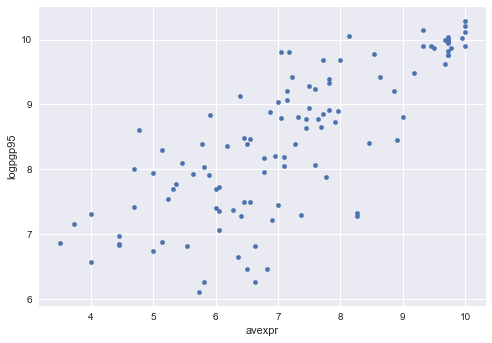

In [19]:
plt.style.use('seaborn')

ajr_df.plot.scatter(x='avexpr', y='logpgp95')
plt.show()

Let's add three-letter country labels to the points:

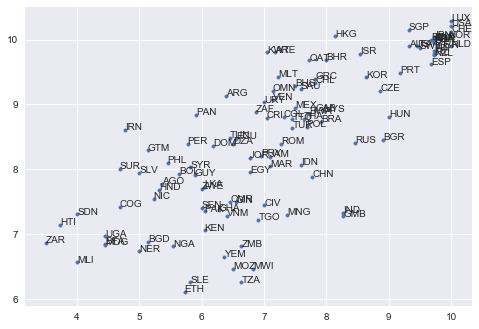

In [20]:
x = ajr_df['avexpr']
y = ajr_df['logpgp95']
labels = ajr_df['shortnam']

fig, ax = plt.subplots()
ax.scatter(x, y, marker='.')

for i, txt in enumerate(labels):
    ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    
plt.show()

In [21]:
x

0           NaN
1      5.363636
2      7.181818
3      6.386364
4           NaN
         ...   
158    6.318182
159    6.863636
160    3.500000
161    6.636364
162    6.000000
Name: avexpr, Length: 163, dtype: float64

Let's fit a linear model to this scatter:

> (1) $ \ln(pgp_95)_i= β_0 + β_1(avexpr_i) + u_i $

* $ β_0 $ is the intercept of the linear trend line on the y-axis
* $ β_1 $ is the slope of the linear trend line, representing the marginal association of protection against against expropriation risk with log GDP per capita
* $ u_i $ is an error term.

Fitting this linear model chooses a straight line that best fits the data in a least-squares, as in the following plot (Figure 2 in AJR):

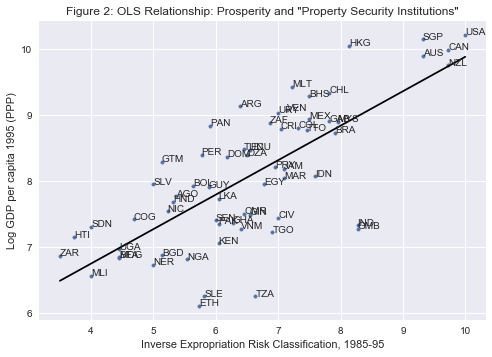

In [22]:
# dropping NA's is required to use numpy's polyfit...
# using only 'base sample' for plotting purposes...


ajr_df = ajr_df.dropna(subset=['logpgp95', 'avexpr'])
ajr_df = ajr_df[ajr_df['baseco'] == 1]

x = ajr_df['avexpr'].tolist()
y = ajr_df['logpgp95'].tolist()
labels = ajr_df['shortnam'].tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, marker='.')

for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
    
ax.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='black')

ax.set_xlabel('Inverse Expropriation Risk Classification, 1985-95')
ax.set_ylabel('Log GDP per capita 1995 (PPP)')
ax.set_title('Figure 2: OLS Relationship: Prosperity and "Property Security Institutions"')

plt.show()

To estimate the constant term $ β_0 $, we need to add a column of 1’s to our dataframe so that we can use statsmodels's OLS routines:

In [23]:
ajr_df['constant'] = 1

regression_1 = sm.OLS(endog=ajr_df['logpgp95'], 
                exog=ajr_df[['constant', 'avexpr']], 
                missing='drop')
results_1 = regression_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     72.82
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           4.72e-12
Time:                        11:16:14   Log-Likelihood:                -68.168
No. Observations:                  64   AIC:                             140.3
Df Residuals:                      62   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       4.6604      0.409     11.408      0.0

We extend our bivariate regression model to a multivariate regression model by adding in other factors correlated with $ \ln(pgp_95)_i $:

* climate, as proxied by latitude
* the different culture and history of different continents

latitude is used to proxy this
differences that affect both economic performance and institutions, eg. cultural, historical, etc.; controlled for with the use of continent dummies
Let’s estimate some of the extended models considered in the paper (Table 2) using data from

In [24]:
ajr2_df = pd.read_csv('https://delong.typepad.com/files/ajr2.csv')
ajr2_df['constant'] = 1

X1 = ['constant', 'avexpr']
X2 = ['constant', 'avexpr', 'lat_abst']
X3 = ['constant', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

regression_2 = sm.OLS(ajr2_df['logpgp95'], ajr2_df[X1], missing='drop').fit()
regression_3 = sm.OLS(ajr2_df['logpgp95'], ajr2_df[X2], missing='drop').fit()
regression_4 = sm.OLS(ajr2_df['logpgp95'], ajr2_df[X3], missing='drop').fit()

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[regression_2, regression_3, regression_4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

        Table 2 - OLS Regressions
                 Model 1 Model 3 Model 4 
-----------------------------------------
constant         4.63*** 4.87*** 5.85*** 
                 (0.30)  (0.33)  (0.34)  
avexpr           0.53*** 0.46*** 0.39*** 
                 (0.04)  (0.06)  (0.05)  
lat_abst                 0.87*   0.33    
                         (0.49)  (0.45)  
asia                             -0.15   
                                 (0.15)  
africa                           -0.92***
                                 (0.17)  
R-squared        0.61    0.62    0.70    
                 0.61    0.62    0.72    
other                            0.30    
                                 (0.37)  
R-squared        0.61    0.62    0.72    
No. observations 111     111     111     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


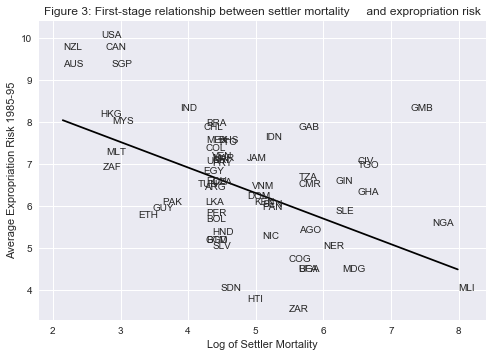

In [25]:
# Dropping NA's is required to use numpy's polyfit
df1_subset2 = ajr_df.dropna(subset=['logem4', 'avexpr'])

X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlim([1.8,8.4])
ax.set_ylim([3.3,10.4])
ax.set_xlabel('Log of Settler Mortality')
ax.set_ylabel('Average Expropriation Risk 1985-95')
ax.set_title('Figure 3: First-stage relationship between settler mortality \
    and expropriation risk')
plt.show()

In [26]:
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')
df4 = df4[df4['baseco'] == 1]
df4['const'] = 1

iv = IV2SLS(dependent=df4['logpgp95'],
            exog=df4['const'],
            endog=df4['avexpr'],
            instruments=df4['logem4']).fit(cov_type='unadjusted')

print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               logpgp95   R-squared:                      0.1870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1739
No. Observations:                  64   F-statistic:                    37.568
Date:                Tue, Sep 22 2020   P-value (F-stat)                0.0000
Time:                        11:16:17   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.9097     1.0106     1.8897     0.0588     -0.0710      3.8903
avexpr         0.9443     0.1541     6.1293     0.00

## Programming Dos and Don'ts...

### A Running List...

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...   
&nbsp;

2. **Do** reload the page when restarting the kernel does not seem to do the job...   
&nbsp;

3. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...   
&nbsp;

4. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be. Only after you are **certain** that your namespace contains what you think it does should you write the next line of code. And then you should immediately test it...   
&nbsp;

5. **Do** take screenshots of your error messages...   
&nbsp;

6. **Do** google your error messages: Ms. Google is your best friend here...   
&nbsp;

7. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...   
&nbsp;

----

&nbsp;

**Thanks to**: Rachel Grossberg, Christopher Hench, Meghana Krishnakumer, Seth Lloyd, Ronald Walker...

----

&nbsp;

## <font color="880000"> Deep Roots of Relative Development </font>

<img src="https://tinyurl.com/20190119a-delong" width="300" style="float:right" />

### <font color="000088">Catch Our Breath—Further Notes:</font>

<br clear="all" />

----

* weblog support: <https://github.com/braddelong/LS2019/blob/master/Deep-Roots-of-Relative-Development.ipynb>
* nbViewer: <https://nbviewer.jupyter.org/github/braddelong/LS2019/blob/master/Deep-Roots-of-Relative-Development.ipynb>
* datahub: <http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LS2019&branch=master&path=Deep-Roots-of-Relative-Development.ipynb>

&nbsp;

----

In [27]:
pwt91_df = pd.read_csv('https://delong.typepad.com/files/pwt91-data.csv')

In [28]:
pwt91_df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
